In [1]:
# import config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from graphviz import Source
from IPython.display import display
from IPython.display import SVG
from math import sqrt
from sklearn import tree
from sklearn import tree 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [2]:
absenteeism = pd.read_csv("Absenteeism_at_work_train.csv")

print(absenteeism.head())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time Age  \
0                     289                               36            13  33   
1                     118                               13            18  50   
2                     179                               51            18  38   
3                     279                                5            14  39   
4                     289                               36            13  33   

  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0        

In [3]:
absenteeism.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [4]:
absenteeism.info()
# Age and Work load Average/day need to be converted from object to Integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    object 
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [5]:
absenteeism.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                 object
Work load Average/day               object
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [6]:
# Change to categorical

absenteeism['ID'] = absenteeism['ID'].astype('category')
absenteeism['Reason for absence'] = absenteeism['Reason for absence'].astype('category')
absenteeism['Month of absence'] = absenteeism['Month of absence'].astype('category')
absenteeism['Day of the week'] = absenteeism['Day of the week'].astype('category')
absenteeism['Seasons'] = absenteeism['Seasons'].astype('category')
absenteeism['Disciplinary failure'] = absenteeism['Disciplinary failure'].astype('category')
absenteeism['Education'] = absenteeism['Education'].astype('category')
absenteeism['Son'] = absenteeism['Son'].astype('category')
absenteeism['Social drinker'] = absenteeism['Social drinker'].astype('category')
absenteeism['Social smoker'] = absenteeism['Social smoker'].astype('category')
absenteeism['Pet'] = absenteeism['Pet'].astype('category')

In [7]:
# Check missing values

absenteeism.isnull().sum()

# Weight and Hit target has missing values

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         1
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             2
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
# Drop NAs

absenteeism = absenteeism.dropna(axis = 0)

absenteeism.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [9]:
# Check Age column values

# We see 'R' as a value for Age in a row. Update it to 0
absenteeism.loc[absenteeism.Age == 'R', "Age"] = 0

# Convert the column to numeric
absenteeism[['Age']] = absenteeism[['Age']].apply(pd.to_numeric)


In [10]:
# To convert 'Work load Average/day' column from object to numeric remove the commas in the values
absenteeism.replace(',','', regex=True, inplace=True)

# Convert the column to numeric
absenteeism["Work load Average/day "] = pd.to_numeric(absenteeism["Work load Average/day "], errors='ignore')

# Renaming the column name to remove the blank space 
absenteeism.rename(columns = {'Work load Average/day ':'Work_load_Average'}, inplace = True)

absenteeism.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense                int64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int64
Work_load_Average                     int64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
dtype: object

In [11]:
# categorising the independent variables in to category "Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work_load_Average', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

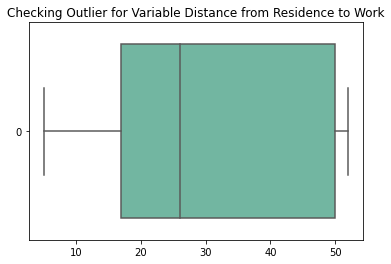

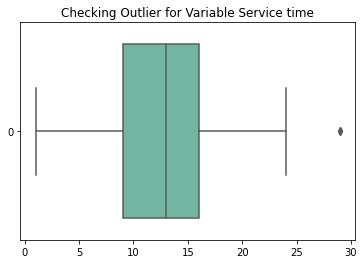

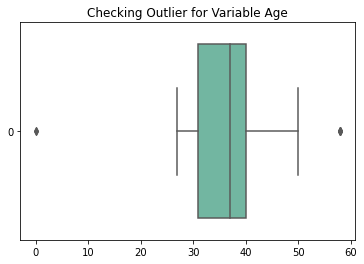

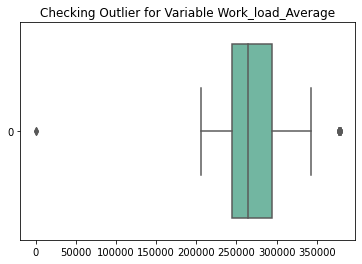

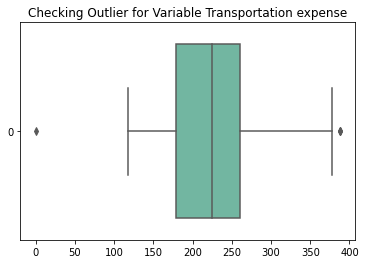

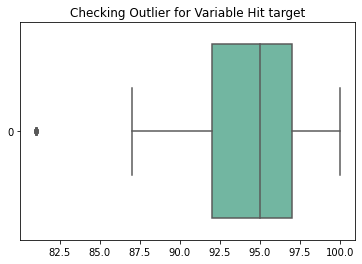

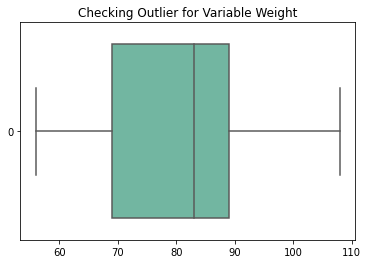

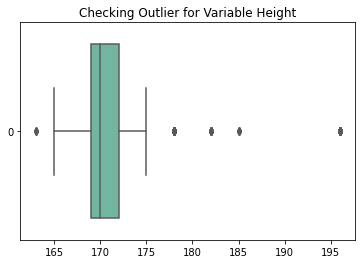

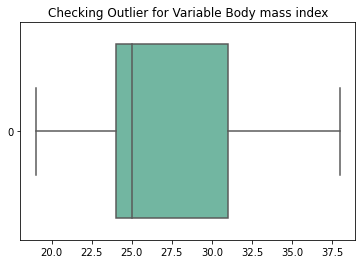

In [12]:
# Outlier check using boxplot

for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.boxplot(data = absenteeism[i], orient="h", palette="Set2")
    plt.title("Checking Outlier for Variable "+str(i))
    plt.show()
 
# We can see outliers in Service time,Age, wor_load_Average per day, Transportation expense, Hit target, Weight, Height, Body Mass index,


In [13]:
# Outlier treatement

# Identify the continuous independent variable with outlier and replace the outliers with the lower bound and upper bound values

# We are treating outliers in all the continous variables except the dependent variable
# The outlier in the dependent variable could be inflencial

for col in continuous_vars : 
    if col == 'Absenteeism time in hours':
        continue
    q1 = absenteeism[col].quantile(.25)
    q3 = absenteeism[col].quantile(.75)
    OQR = q3 - q1
    lb = q1-(q3-q1)*1.5
    ub = q3+(q3-q1)*1.5
    absenteeism[col] = np.where(absenteeism[col] < lb, lb,absenteeism[col])
    absenteeism[col] = np.where(absenteeism[col] > ub, ub,absenteeism[col])

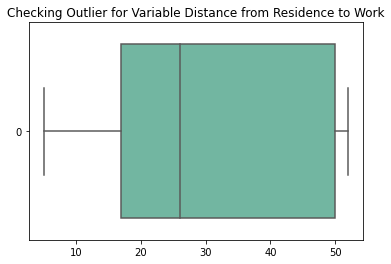

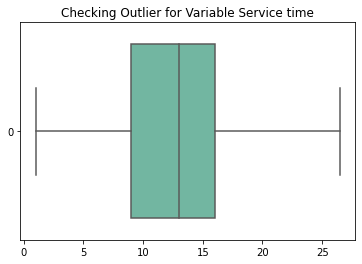

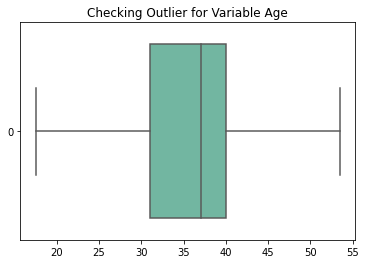

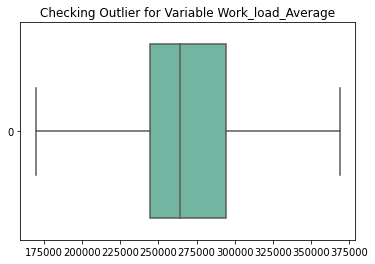

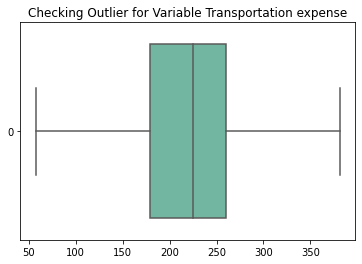

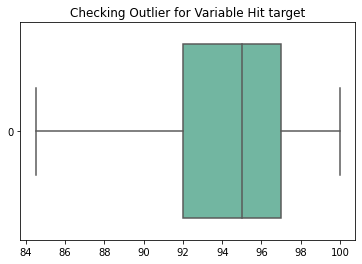

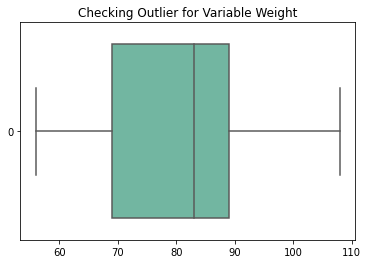

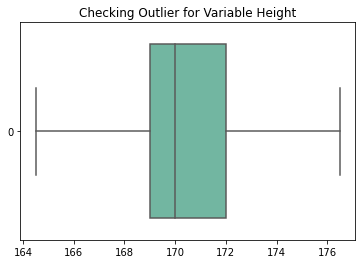

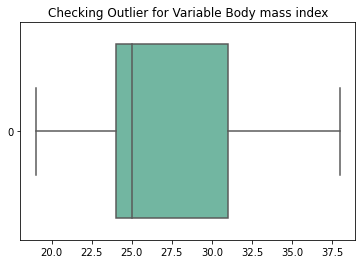

In [14]:
# Check outliers post outlier treatment

for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.boxplot(data = absenteeism[i], orient="h", palette="Set2")
    plt.title("Checking Outlier for Variable "+str(i))
    plt.show()
 
# plot shows that the outliers are updated

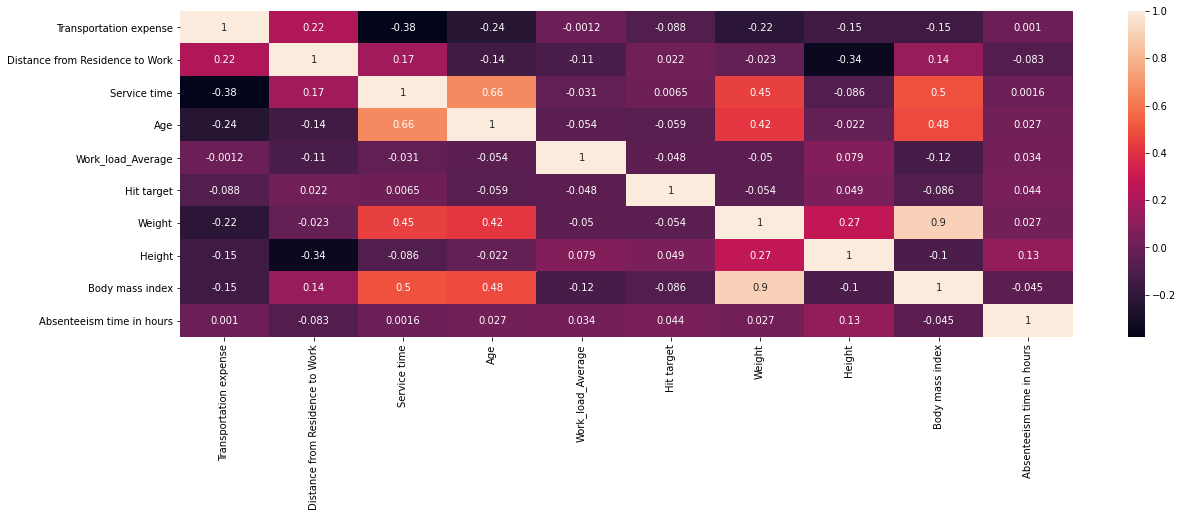

In [15]:
# Check the correlation between the variables using heatmap

plt.figure(figsize = (20,6))
sns.heatmap(absenteeism.corr(), annot = True)
plt.show()

# With the help of correlation plot we can see that Body Mass Index and Weight has high correlation near to 1. 
# Which determines that we can drop one of the variable from the dataset. 
# Similarly Service time and Age has a significant correlation too

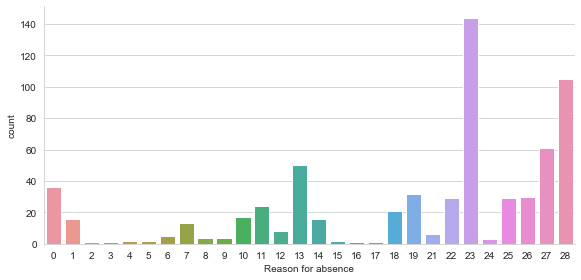

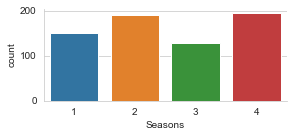

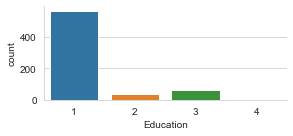

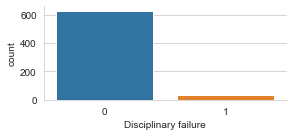

In [12]:
# Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=absenteeism, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=absenteeism, x='Seasons', kind= 'count',size=2,aspect=2)
sns.factorplot(data=absenteeism, x='Education', kind= 'count',size=2,aspect=2)
sns.factorplot(data=absenteeism, x='Disciplinary failure', kind= 'count',size=2,aspect=2)

Text(0.5, 1.0, 'Weight Distribution')

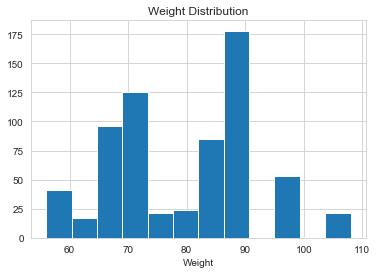

In [17]:
plt.hist(data=absenteeism, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Age Distribution')

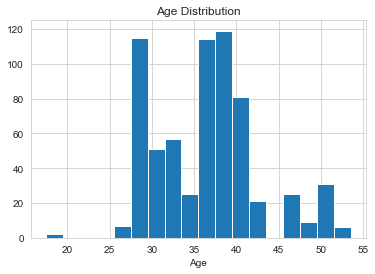

In [18]:
# Check the distribution of numerical data using histogram
plt.hist(data=absenteeism, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

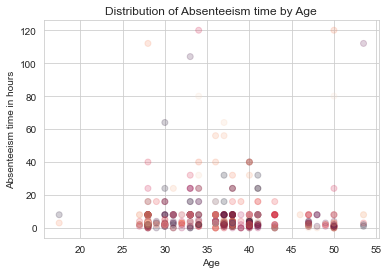

In [19]:
# Fixing random state for reproducibility
np.random.seed(19680801)
N = 663
x = absenteeism['Age']
y = absenteeism['Absenteeism time in hours']
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Age")
plt.show()

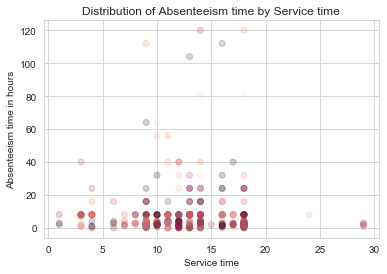

In [13]:
#', 'Age', 'Work_load_Average'

# Fixing random state for reproducibility
np.random.seed(19680801)
N = 663
x = absenteeism['Service time']
y = absenteeism['Absenteeism time in hours']
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.2)
plt.xlabel("Service time")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Service time")
plt.show()

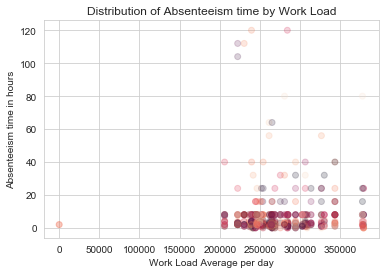

In [14]:
# Fixing random state for reproducibility
np.random.seed(19680801)
N = 663
x = absenteeism['Work_load_Average']
y = absenteeism['Absenteeism time in hours']
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.2)
plt.xlabel("Work Load Average per day")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Work Load")
plt.show()

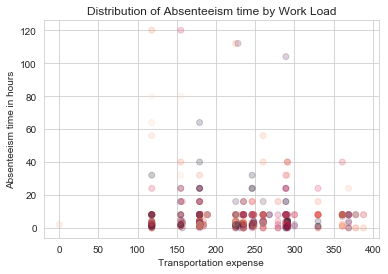

In [16]:
# Fixing random state for reproducibility
np.random.seed(19680801)
N = 663
x = absenteeism['Transportation expense']
y = absenteeism['Absenteeism time in hours']
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.2)
plt.xlabel("Transportation expense")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Work Load")
plt.show()

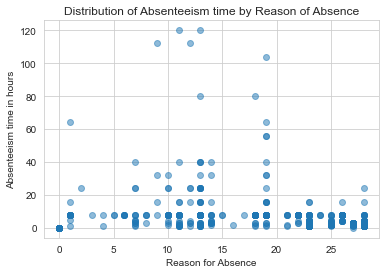

In [20]:
x = absenteeism['Reason for absence']
y = absenteeism['Absenteeism time in hours']
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Reason for Absence")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Reason of Absence")
plt.show()

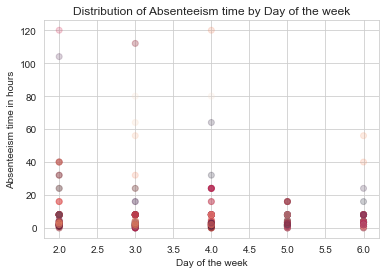

In [21]:
# Fixing random state for reproducibility
np.random.seed(19680801)
N = 663
x = absenteeism['Day of the week']
y = absenteeism['Absenteeism time in hours']
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.2)
plt.xlabel("Day of the week")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Day of the week")
plt.show()

## Feature Selection

In [22]:
# Get dataframe with all continuous variables
absenteeism_corr = absenteeism.loc[:,continuous_vars]

[]

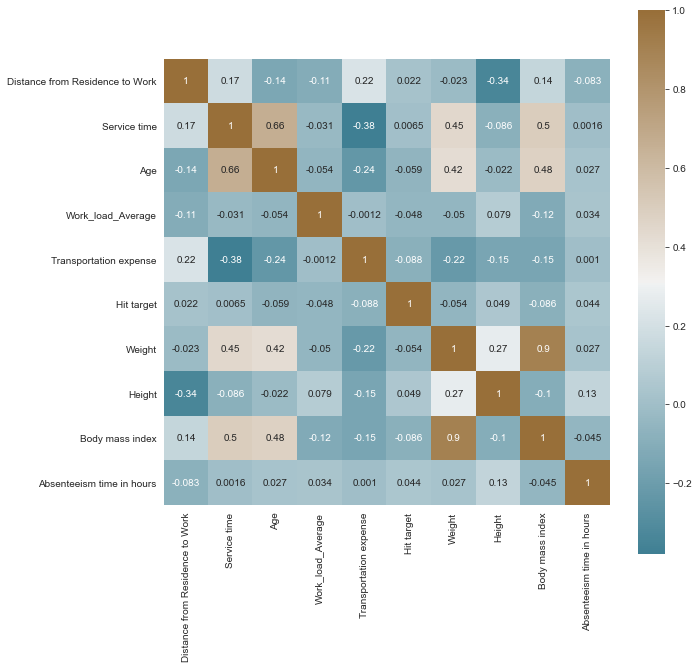

In [23]:
# Check for multicollinearity using corelation graph
# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

# Generate correlation matrix
corr = absenteeism_corr.corr()

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [24]:
# Variable Reduction
to_drop = ['Weight']
absenteeism = absenteeism.drop(to_drop, axis = 1)

In [25]:
# Updating the Continuous and Categorical Variables
continuous_vars.remove('Weight')

In [26]:
# Make a copy of clean data and export it as excel file
clean_data = absenteeism.copy()

In [27]:
continuous_vars

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work_load_Average',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

## Feature Scaling

/Users/krutarthshah/PycharmProjects/practice/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/krutarthshah/PycharmProjects/practice/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/krutarthshah/PycharmProjects/practice/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

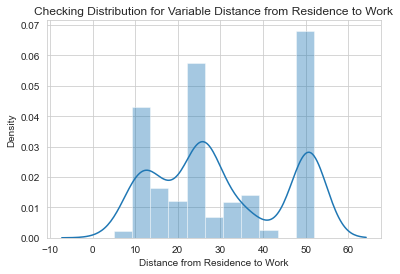

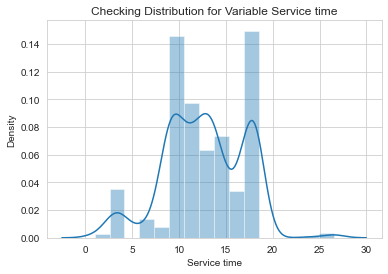

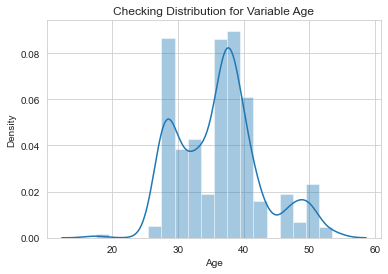

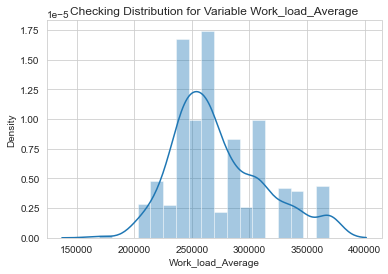

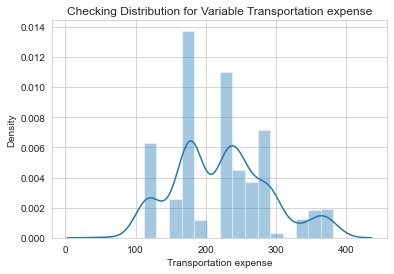

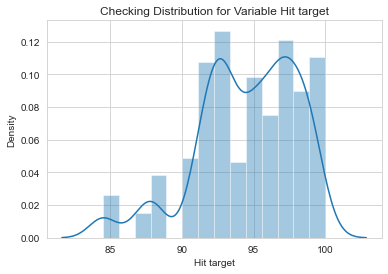

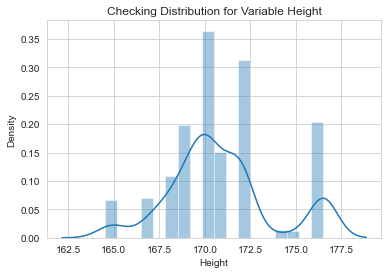

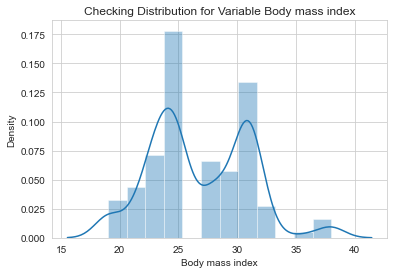

In [28]:
# Normality check
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(absenteeism[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [29]:
# Normalization of continuous variables

for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    absenteeism[i] = (absenteeism[i] - absenteeism[i].min())/(absenteeism[i].max()-absenteeism[i].min())
    
    
print(absenteeism.head())

   ID Reason for absence Month of absence Day of the week Seasons  \
0  11                 26                7               3       1   
1  36                  0                7               3       1   
2   3                 23                7               4       1   
3   7                  7                7               5       1   
4  11                 23                7               5       1   

   Transportation expense  Distance from Residence to Work  Service time  \
0                0.714506                         0.659574      0.470588   
1                0.186728                         0.170213      0.666667   
2                0.375000                         0.978723      0.666667   
3                0.683642                         0.000000      0.509804   
4                0.714506                         0.659574      0.470588   

        Age  Work_load_Average  Hit target Disciplinary failure Education Son  \
0  0.430556           0.350753    0.806452     

In [30]:
# Copying dataframe for classification
ab_class = absenteeism.copy()
ab_class.shape

(663, 20)

In [31]:
# Define function to group hours
def ab_hour_groups(x): 
    if x==0: return 0 
    if x>0 and x<=6: return 1
    if x>6: return 2

In [32]:
ab_class['Ab'] = ab_class['Absenteeism time in hours'].apply(ab_hour_groups).astype('category')

In [33]:
ab_class.shape

(663, 21)

In [34]:
ab_class.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work_load_Average,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours,Ab
0,11,26,7,3,1,0.714506,0.659574,0.470588,0.430556,0.350753,...,0,1,2,1,0,1,0.625000,0.578947,4,1
1,36,0,7,3,1,0.186728,0.170213,0.666667,0.902778,0.350753,...,1,1,1,1,0,0,1.000000,0.631579,0,0
2,3,23,7,4,1,0.375000,0.978723,0.666667,0.569444,0.350753,...,0,1,0,1,0,0,0.458333,0.631579,2,1
3,7,7,7,5,1,0.683642,0.000000,0.509804,0.597222,0.350753,...,0,1,2,1,1,0,0.291667,0.263158,4,1
4,11,23,7,5,1,0.714506,0.659574,0.470588,0.430556,0.350753,...,0,1,2,1,0,1,0.625000,0.578947,2,1


## Machine Learning Models

### Decision Tree with Classification

In [35]:
y1 = ab_class['Ab']
X1 = ab_class.drop (['Absenteeism time in hours', 'Ab'], axis = 1)

In [36]:
# Splitting Train and Test datasets
random.seed(123)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 52)

In [37]:
# Training the model on data
model = tree.DecisionTreeClassifier()
model = model.fit(X1_train, y1_train)

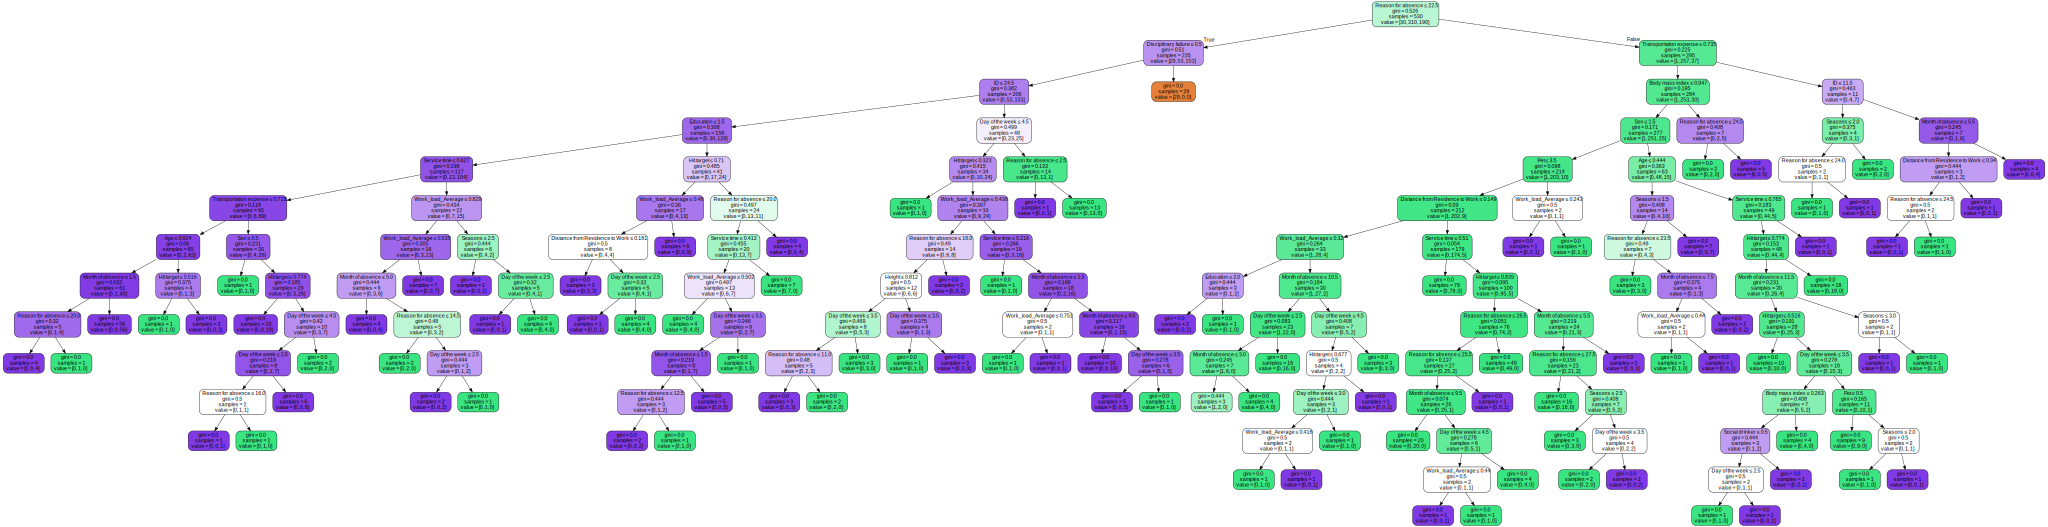

In [38]:
# Visualize the model
export_graphviz(model, out_file ='tree.dot', feature_names=X1.columns)
dot_data = tree.export_graphviz(
            model, out_file=None,
            feature_names=X1.columns, 
            filled=True, rounded=True, 
            special_characters=True) 

graph = Source(dot_data)
graph

In [39]:
# Executing model on test data
y1_predict = model.predict(X1_test)

In [40]:
#Evaluating Model Performance
print(confusion_matrix(y1_test, y1_predict)) 
print(accuracy_score(y1_test, y1_predict)*100)

[[ 7  0  0]
 [ 0 60 15]
 [ 0 17 34]]
75.93984962406014


### Random Forest with Classification

In [41]:
# Training model on data
clf = RandomForestClassifier()
clf.fit(X1_train, y1_train)

RandomForestClassifier()

In [42]:
# Executing model on test data
y1_predict = clf.predict(X1_test) 

In [43]:
# Evaluating Model Performance
print(confusion_matrix(y1_test, y1_predict))
print(accuracy_score(y1_test, y1_predict)*100)

[[ 7  0  0]
 [ 0 66  9]
 [ 0 14 37]]
82.70676691729322


## Data Prep for Regression Models

In [44]:
# Create dummy variables of factor variables
absenteeism = pd.get_dummies(data = absenteeism, columns = categorical_vars)

# Copying dataframe
absenteeism_copy = absenteeism.copy()

In [45]:
# Get number of rows and columns
absenteeism.shape

(663, 113)

In [46]:
# Observe the first row
absenteeism.head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work_load_Average,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1,...,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Son_0,Son_1,Son_2,Son_3,Son_4
0,0.714506,0.659574,0.470588,0.430556,0.350753,0.806452,0.625,0.578947,4,0,...,1,0,0,0,0,0,0,1,0,0


In [47]:
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    absenteeism.iloc[:, absenteeism.columns != 'Absenteeism time in hours'], 
    absenteeism.iloc[:, 8], test_size = 0.20, random_state = 1
)

In [48]:
# Utility

def calculate_root_mean_square_error(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

### Decision Tree with Regression

In [49]:
# Build decsion tree using DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state = 1).fit(X_train, y_train)

# Perdict for test cases
decision_tree_predictions = decision_tree_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_decision_tree = pd.DataFrame({'actual': y_test, 'pred': decision_tree_predictions})
print(absenteeism_decision_tree.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(str(calculate_root_mean_square_error(y_test, decision_tree_predictions))))
print("R#^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, decision_tree_predictions))))

     actual  pred
328       2   3.0
148       1   2.0
47        4   4.0
301      16   8.0
507       1   3.0
Root Mean Squared Error: 11.340674682559195
R#^2 Score(coefficient of determination): 0.16924356555823605


### Random Forest with Regression

In [50]:
# Build random forest using RandomForestRegressor
random_forest_model = RandomForestRegressor().fit(X_train,y_train)

# Perdict for test cases
random_forest_model_predictions = random_forest_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_random_forest = pd.DataFrame({'actual': y_test, 'pred': random_forest_model_predictions})
print(absenteeism_random_forest.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(
    str(calculate_root_mean_square_error(y_test, random_forest_model_predictions)))
)
print("R#^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, random_forest_model_predictions))))

     actual       pred
328       2   3.347500
148       1   2.946000
47        4   2.784333
301      16  22.920000
507       1   6.260000
Root Mean Squared Error: 11.177852956180518
R#^2 Score(coefficient of determination): 0.19292719595456886


### Dimension Reduction using PCA

In [51]:
# Get the target variable
target = absenteeism['Absenteeism time in hours']

In [52]:
# Get the number of rows and columns of data
absenteeism.shape

(663, 113)

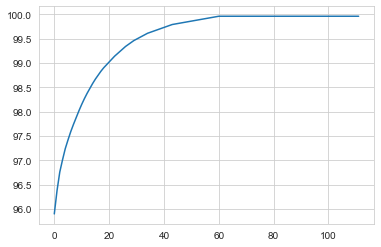

In [53]:
# Converting data to numpy array
X = absenteeism.values

# Data has 116 variables so no of components of PCA = 115
# Changed from 115 to 112
pca = PCA(n_components=112)
pca.fit(X)

# Proportion of variance explained
explained_variance_ratio = pca.explained_variance_ratio_

#Cumulative scree plot
cum_sum = np.cumsum(np.round(explained_variance_ratio, decimals=4)*100)

# Draw the plot
plt.plot(cum_sum)
plt.show()

In [54]:
# Selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

#S plitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state = 1)

### Decision Tree with regression using PCA

In [55]:
# Build decsion tree using DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=1).fit(X_train,y_train)

# Perdict for test cases
decision_tree_predictions = decision_tree_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_decision_tree = pd.DataFrame({'actual': y_test, 'pred': decision_tree_predictions})
print(absenteeism_decision_tree.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(str(calculate_root_mean_square_error(y_test, decision_tree_predictions))))
print("R^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, decision_tree_predictions))))

     actual  pred
328       2   2.0
148       1   1.0
47        4   4.0
301      16  16.0
507       1   1.0
Root Mean Squared Error: 0.9848476085314292
R^2 Score(coefficient of determination): 0.9937348135781127


### Random Forest with regression using PCA

In [56]:
# Build random forest using RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

# Perdict for test cases
random_forest_model_predictions = random_forest_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_random_forest = pd.DataFrame({'actual': y_test, 'pred': random_forest_model_predictions})
print(absenteeism_random_forest.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(
    str(calculate_root_mean_square_error(y_test, random_forest_model_predictions)))
)
print("R#^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, random_forest_model_predictions))))

     actual    pred
328       2   2.000
148       1   1.000
47        4   4.002
301      16  16.032
507       1   1.000
Root Mean Squared Error: 0.8033343857562343
R#^2 Score(coefficient of determination): 0.995831415183537
